<a href="https://colab.research.google.com/github/vitorsanp/ds_portfolio/blob/main/EDA_Beer_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA (Exploratory Data Analysis)

##Tema: Produção de cerveja - Alcohol and Tobacco Tax and Trade Bureau (TTB)
---

###Arquivos de dados:
*   Produção de cerveja nos EUA por ano (2008-2019)
*   Numeros de cervejarias por volume de produção por ano (2008-2019)
*   Estatísticas mensais agregadas de cerveja nos EUA (2008-2019)

###Considerações sobre os dados:
* 1 Barril = 31 Galões = 1,17348 Hectolitros = 117,348 Litros

###Questões a serem respondidas:

1.   Quais são e onde estão localizados os estados que mais produzem cerveja ?
2.   Quais são as variações anuais de produção de cerveja por estados ?
3.   Quais foram os anos que tiveram maior volume de cerveja exportada ?
4.   Quais os grupos cervejeiros que exportaram mais no período ?
5.   Quais os períodos e tipos de cervejas que mais pagaram tributos ?

# 1. Importação de bibliotecas e arquivos de dados

In [ ]:
#Bibliotecas
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
import plotly.express as px

#Configuração de float
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
#Dados
##Fonte: https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-03-31/readme.md
#brewing_materials = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/brewing_materials.csv')
beer_taxed = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_taxed.csv')
brewer_size = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/brewer_size.csv')
beer_states = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')

#2. Dicionário dos arquivos de dados importados

## 2.1 brewing_materials

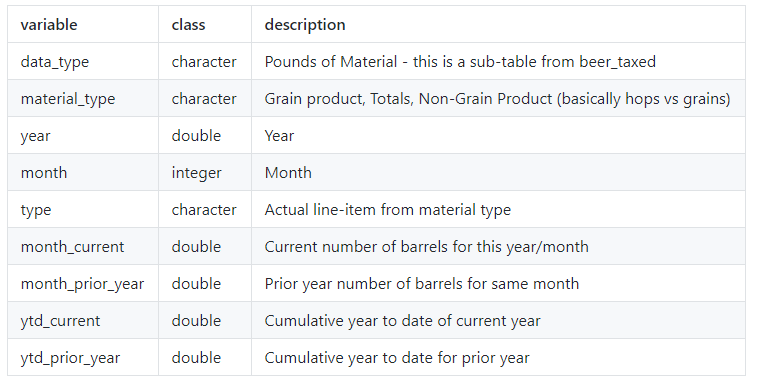

## 2.2 beer_states

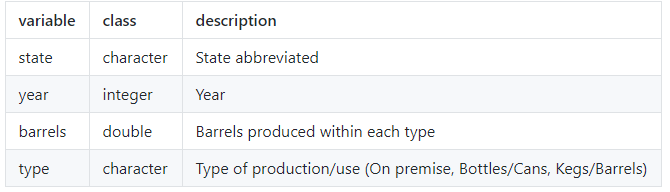

## 2.3 beer_taxed

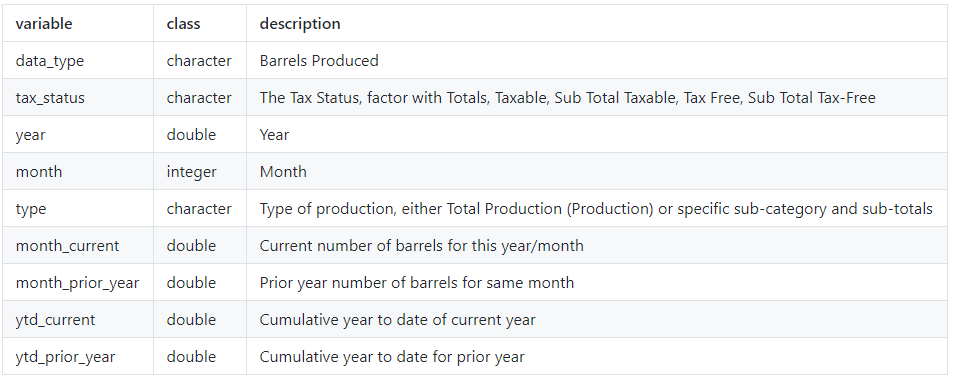

## 2.4 brewer_size

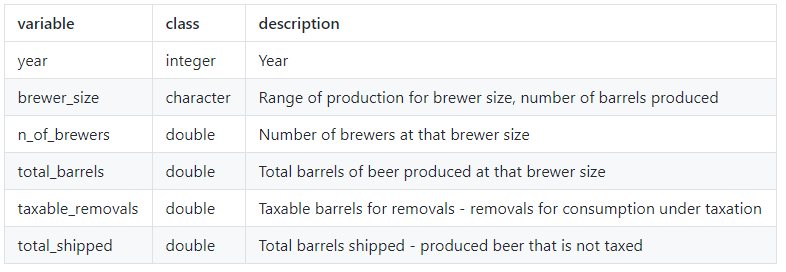

#3. Análise exploratória

##3.1 Dataset - beer_states

In [ ]:
##beer_states
#Entendimento da estrutura da tabela
print('shape',beer_states.shape)
beer_states.head(1)

shape (1872, 4)


,state,year,barrels,type
0,AK,2008,"2,067.69",On Premises


In [ ]:
#Transformações simples
#beer_states.state.unique()
beer_states_ = beer_states.copy()

#Remoção da linha 'total'
beer_states_ = beer_states_[beer_states_['state']!= 'total']

In [ ]:
#Inclusão de coluna complementar (Hectolitro)
barrel_to_hl = 1.17348
beer_states_['HL'] = (beer_states_.barrels * barrel_to_hl).astype(float)
beer_states_.head(1)

,state,year,barrels,type,HL
0,AK,2008,"2,067.69",On Premises,"2,426.39"


In [ ]:
#Entendimento dos volumes totais produzidos em cada estado
states0 = beer_states_.groupby('year').HL.sum().reset_index()
fig = px.bar(states0, x='year', y='HL', title="Produção anual de cerveja", )
fig.show()

In [ ]:
#Questão 1 - Quais são e onde estão localizados os estados que mais produzem cerveja ?
#Entendimento dos volumes totais produzidos em cada estado
states1 = beer_states_.groupby('state').HL.sum().reset_index()
fig = px.choropleth(locations=states1.state, color = states1.HL, color_continuous_scale="tempo", locationmode="USA-states", scope="usa", title="Volume total (HL) de cerveja produzido por estado (EUA) de 2008 a 2019")
fig.show()

In [ ]:
#Entendimento dos volumes totais produzidos anualmente por tipo de produto
states2 = beer_states_.groupby(['year','type']).HL.sum().reset_index()
fig = px.area(states2, x='year',facet_col='type', y='HL', title="Produção anual de cerveja por tipo de produto")
fig.show()

In [ ]:
#Variação anual da produção de cerveja
states3 = beer_states_.groupby('year')['HL'].sum().reset_index()
states3['pct_ch'] = states3['HL'].pct_change()

fig = px.bar(states3, x='year', y='pct_ch',title="Variação (%) anual de produção de cerveja")
fig.show()

In [ ]:
#Questão 2 - Quais são as variações anuais de produção de cerveja por estado ?

#Variação anual da produção de cerveja dos estados
states4 = beer_states_.groupby(['state','year'])['HL'].sum().reset_index()
states4['pct_ch'] = states4.groupby('state')['HL'].pct_change()

#states4.sort_values(['state','year']).head(16)
#states4[states4['state']=='TN']

fig = px.line(states4[states4['state']!='TN'], x='year', y='pct_ch',color='state' ,title="Variação (%) anual de cerveja por estado")
fig.show()

##3.2 Dataset  - brewer_size

In [ ]:
##beer_taxed
print('shape',brewer_size.shape)
brewer_size.head()

shape (137, 6)


,year,brewer_size,n_of_brewers,total_barrels,taxable_removals,total_shipped
0,2009,"6,000,001 Barrels and Over",18,"171,232,881.59","159,643,984.23","3,639,970.00"
1,2009,"1,000,001 to 6,000,000 Barrels",4,"9,970,404.28","9,592,722.75","14,548.00"
2,2009,"500,001 to 1,000,000 Barrels",7,"4,831,385.68","4,535,659.48","21,563.00"
3,2009,"100,001 to 500,000 Barrels",27,"5,422,155.72","4,469,288.93","128,000.00"
4,2009,"60,001 to 100,000 Barrels",19,"1,501,976.56","1,224,618.44","95,732.00"


In [ ]:
#Copia de tabela
brewer_size_ = brewer_size.copy()

#Inclusão de coluna complementar (Hectolitro)
barrel_to_hl = 1.17348
brewer_size_['HL_shipped'] = (brewer_size_.total_shipped * barrel_to_hl).astype(float)
brewer_size_['HL_total'] = (brewer_size_.total_barrels * barrel_to_hl).astype(float)
brewer_size_['HL_to_sales'] = (brewer_size_.taxable_removals * barrel_to_hl).astype(float)
brewer_size_.head(1)

,year,brewer_size,n_of_brewers,total_barrels,taxable_removals,total_shipped,HL_shipped,HL_total,HL_to_sales
0,2009,"6,000,001 Barrels and Over",18,"171,232,881.59","159,643,984.23","3,639,970.00","4,271,432.00","200,938,361.89","187,339,022.61"


In [ ]:
brewer_size_.describe()

,year,n_of_brewers,total_barrels,taxable_removals,total_shipped,HL_shipped,HL_total,HL_to_sales
count,137.00,137.00,136.00,137.00,135.00,135.00,136.00,137.00
mean,"2,014.18",612.35,"30,796,075.13","28,247,188.18","885,245.75","1,038,818.18","36,138,578.25","33,147,510.39"
std,3.19,"1,313.52","61,158,938.00","56,377,822.87","1,854,340.92","2,176,031.99","71,768,790.57","66,158,247.58"
min,"2,009.00",3.00,0.00,"14,711.36",12.00,14.08,0.00,"17,263.49"
25%,"2,011.00",15.00,"1,382,425.82","1,203,851.81","6,544.50","7,679.84","1,622,249.05","1,412,696.02"
50%,"2,014.00",43.00,"3,055,304.71","2,714,928.75","39,494.00","46,345.42","3,585,338.98","3,185,914.59"
75%,"2,017.00",428.00,"10,513,168.19","8,697,815.57","265,117.50","311,110.08","12,336,992.61","10,206,712.62"
max,"2,019.00","6,400.00","196,969,275.00","182,995,469.16","6,908,958.00","8,107,524.03","231,139,504.83","214,741,523.15"


In [ ]:
size0 = brewer_size_[brewer_size_['brewer_size']!='Total'].groupby('brewer_size').HL_total.sum().reset_index()
fig = px.pie(size0,  values ='HL_total', color='brewer_size', hole= 0.4, title="Compartilhamento da produção total de cerveja por tamanho das cervejaria")
fig.show()

In [ ]:
#Questão 3 - Quais foram os anos que tiveram maior volume de cerveja exportada ?
#Volume de cerveja exportada anualmente
size1 = brewer_size_[brewer_size_['brewer_size']=='Total'].groupby('year').HL_shipped.sum().reset_index()
fig = px.bar(size1, x='year', y='HL_shipped', title="Volume (HL) anual de cerveja exportada", )
fig.show()

In [ ]:
#Questão 4 - Quais os grupos cervejeiros que exportaram mais no período ?
size2 = brewer_size_[brewer_size_['brewer_size']!='Total'].groupby(['brewer_size']).HL_shipped.sum().reset_index().sort_values('HL_shipped', ascending=True)
fig = px.bar(size2, x='HL_shipped', y='brewer_size',  title="Volume (HL) anual de cerveja exportada por tamanho de cervejaria", orientation="h")
fig.show()

##3.3 Dataset  - beer_taxed

In [ ]:
##brewing_materials
print('shape',beer_taxed.shape)
beer_taxed.head(5)

shape (1580, 10)


,data_type,tax_status,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year,tax_rate
0,Barrels Produced,Totals,2008,1,Production,16211480,15880125,16211480.0,15880125.0,$7/$18 per barrel
1,Barrels Produced,Taxable,2008,1,In bottles and cans,13222104,12824278,13222104.0,12824278.0,$7/$18 per barrel
2,Barrels Produced,Taxable,2008,1,In barrels and kegs,1371239,1357372,1371239.0,1357372.0,$7/$18 per barrel
3,Barrels Produced,Taxable,2008,1,"Tax Determined, Premises Use",7426,8419,7426.0,8419.0,$7/$18 per barrel
4,Barrels Produced,Sub Total Taxable,2008,1,Sub Total Taxable,14600769,14190069,14600769.0,14190069.0,$7/$18 per barrel


In [ ]:
##Detalhes sobre taxação sob barril de cerveja produzido
## Tax Rates for Beer that is Removed or Imported During Calendar Years 2018 - 2020 = $16.00
## Calendar Years 2017-earlier for Alcohol = $18 

In [ ]:
#Copia de tabela
beer_taxed_ = beer_taxed.copy()

#Inclusão de coluna complementar (Hectolitro), ano/mes e impostos estimados (Taxes)
barrel_to_hl = 1.17348
beer_taxed_['HL_month'] = (beer_taxed_.month_current * barrel_to_hl).astype(float)

beer_taxed_['ym'] = pd.to_datetime(dict(year=beer_taxed_['year'],month=beer_taxed_['month'],day='1'),format='%Y%m')

tax = 18  
beer_taxed_['Taxes_month'] = np.where(beer_taxed_['year']<=2017, (beer_taxed_.month_current * 18).astype(float), (beer_taxed_.month_current * 16))

beer_taxed_.head(1)

,data_type,tax_status,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year,tax_rate,HL_month,ym,Taxes_month
0,Barrels Produced,Totals,2008,1,Production,16211480,15880125,"16,211,480.00","15,880,125.00",$7/$18 per barrel,"19,023,847.55",2008-01-01,"291,806,640.00"


In [ ]:
taxes0 = beer_taxed_[beer_taxed_['type'].str.contains('In ')].groupby(['type','year']).Taxes_month.sum().reset_index()

fig = px.bar(taxes0, x='year', y='Taxes_month', color='type', title="Valor total (US$) de impostos pagos anualmente")
fig.show()

In [ ]:
##Questão 5 - Quais os períodos e tipos de cervejas que mais pagaram tributos ?

taxes1 = beer_taxed_[beer_taxed_['type'].str.contains('In ')].groupby(['type','ym']).Taxes_month.sum().reset_index()

fig = px.bar(taxes1, x='ym', y='Taxes_month', color='type', title="Valor total (US$) de impostos pagos anualmente")
fig.show()

In [ ]:
taxes2 = beer_taxed_[beer_taxed_['type'].str.contains('In ')].groupby(['type','month']).Taxes_month.sum().reset_index()

fig = px.bar(taxes2, x='month', y='Taxes_month', color='type', title="Valor total (US$) de impostos pagos anualmente")
fig.show()

#4. Conclusão

####Por se tratar de dados já resumidos e agrupados, podemos tirar conclusões  direcionadas aos próprios resultados da indústria, com números gerais e granularidade limitada a tipos de produção, estados dos EUA e ano.

####A partir dos dados analisados, foi possível observar que o volume anual de cerveja produzida está em queda, de 216 mi de Hectolitros produzidos em 2008 para 196 mi de Hectolitros em 2019. De modo geral, o tipo de produção mais presente nesta queda são as garrafas e latas, com uma queda de aproximadamente 20 mi HL. Durante todo o período, apenas dois anos tiveram aumento na produção 2012 (1.3%) e 2019 (0.1%). As variações na produção anual entre os estados são similares na maior parte dos anos analisados.

####A maior parcela da produção de cerveja, 83%, vem das grandes cervejarias (que produzem 2 Milhões ou mais de galões por ano). Da mesma forma são as maiores cervejarias que possuem o maior volume exportado, que de forma contrária a queda de produção possui uma crescente de exportação, com aproximadamente 8 milhões de hectolitros exportados em 2018. Cabe destacar o grupo de média cervejaria, com produção entre 100 e 500 mil galões por ano, que exportou 3 milhões de HL entre 2008 e 2019.

####Em relação a impostos, considerando os valores aproximados, os maiores valores foram pagos nos primeiros anos da amostra analisada, com 3 Bilhões de dolares pagos em 2008, e nos principais tipos de produção de cerveja, garrafas e latas. Outro ponto identificado é o pagamento dos maiores valores nosm eses de maio e junho.